# 도전과제 

# wordcloud

**데이터전처리는 필수과제와 동일(약간의 추가사항 있음)**

### 1. 전처리한 데이터를 가져와 약간의 수정과 감성분석적용

In [77]:
# 텍스트 전처리와 자연어 처리를 위한 라이브러리
import nltk
from textblob import TextBlob

# 토픽 모델링을 위한 라이브러리
import gensim
from gensim import corpora
from gensim.utils import simple_preprocess

# 감성 분석을 위한 함수
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['sentiment'] = df['content'].apply(get_sentiment)
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'positive' if x > 0.1 else ('negative' if x < -0.1 else 'neutral'))
df[['content', 'score', 'sentiment_label']]


,content,score,sentiment_label
0,good experience. great customer service.,5,positive
1,bro watching w cartoon error came next season ...,1,negative
2,desent,5,neutral
3,scam company.. loot people money name giftcard...,1,positive
4,stopped opening. ive uninstalled reinstalled s...,1,neutral
...,...,...,...
117035,really like it! many movies kdramas watch,5,positive
117036,love netflix. always enjoy time using it.,5,positive
117037,sound quality slow movies,1,neutral
117038,"rate expensive.. bcos see netflix sunday only,...",1,negative


### 2. 감성분석과 점수를 기준으로 긍정과/부정을 나눔

In [78]:
positive = df[(df['sentiment_label'] == 'positive')&(df['score'] > 3)]['content']
negative = df[(df['sentiment_label'] == 'negative')&(df['score'] < 3)]['content']

### 3.워드클라우드를 용이하게 이용하기위해 텍스트파일로 변환

In [80]:
positive.to_csv('positive.txt', index=False, header=None, sep="\t")
negative.to_csv('negative.txt', index=False, header=None, sep="\t")

### 4. 부정리뷰 파일불러오기 & 이미지 파일 확인

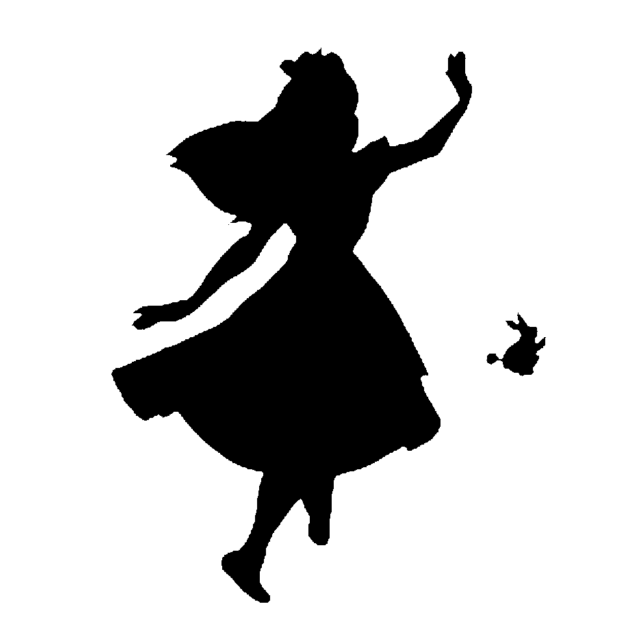

In [169]:
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# 텍스트파일 열기
text = open('/Users/t2023-m0072/Desktop/ml_team_task/challenge/negative.txt').read()
# 마스크 이미지 가져오기
alice_mask = np.array(Image.open('/Users/t2023-m0072/Desktop/images/alice_mask.png'))

# 불용어 지정
stopwords = set(STOPWORDS)
stopwords.update(['netflix', 'movie', 'movies', 'show', 'shows', 'watch', 'account', 'time', 'app', 'series', 'phone', 'good','use','now','cant','dont','even','tv','update','download','open','new'])

# 이미지 확인
plt.figure(figsize = (8,8))
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

### 3. 부정리뷰 워드클라우드 생성

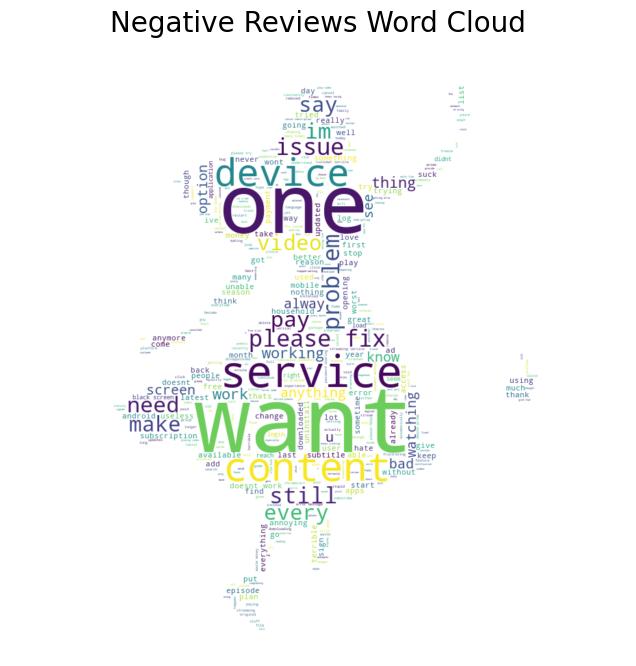

In [172]:
# 단어들 설정과 빈도분석
wc = WordCloud(background_color = 'white', max_words = 1500, mask = alice_mask, stopwords=stopwords)
wc = wc.generate(text)                 

# 워드클라우드생성
plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation='bilinear')
plt.title('Negative Reviews Word Cloud', size=20)
plt.axis('off')
plt.show()

### 4. 긍정리뷰 불러오기 & 이미지 파일 확인

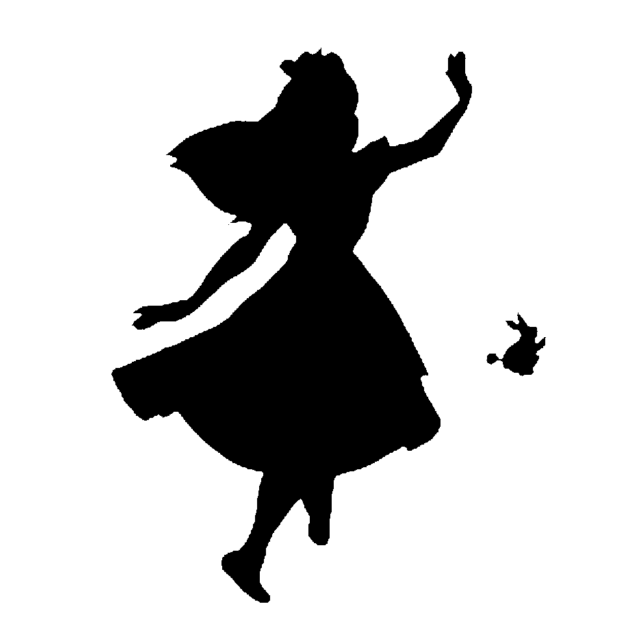

In [174]:
# 텍스트파일 열기
text1 = open('/Users/t2023-m0072/Desktop/ml_team_task/challenge/positive.txt').read()
# 마스크 이미지 가져오기
alice_mask = np.array(Image.open('/Users/t2023-m0072/Desktop/images/alice_mask.png'))

# 불용어 지정
stopwords = set(STOPWORDS)
stopwords.update(['netflix', 'movie', 'movies', 'show', 'shows', 'watch', 'account', 'time', 'app', 'series', 'phone','use','now','problem','cant','dont','even','tv','update','download','open','new'])

# 이미지 확인
plt.figure(figsize = (8,8))
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

### 5. 긍정리뷰 워드클라우드 생성

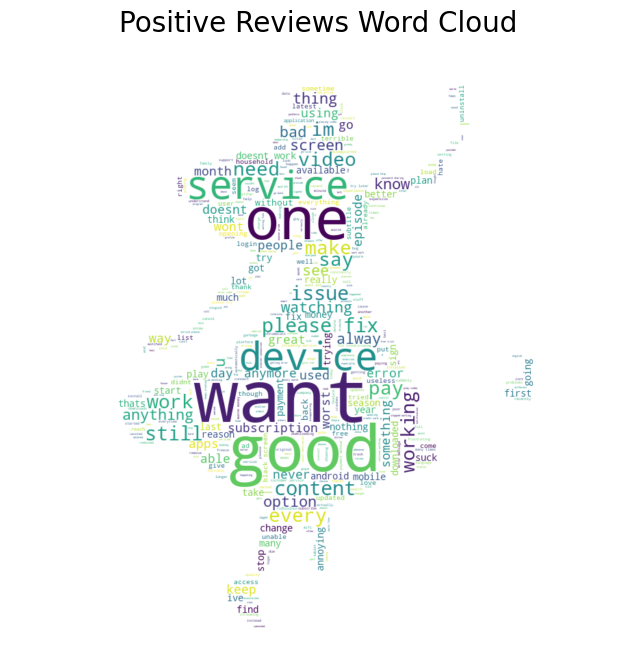

In [176]:
# 단어들 설정과 빈도분석
wc = WordCloud(background_color = 'white', max_words = 1500, mask = alice_mask, stopwords=stopwords)
wc = wc.generate(text)                  

# 워드클라우드생성
plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation='bilinear')
plt.title('Positive Reviews Word Cloud', size=20)
plt.axis('off')
plt.show()